## Imported Library

In [1]:
import requests
from bs4 import BeautifulSoup

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Scrapping List of Countries by Continent from Wikipedia

In [2]:
# Mengambil data dari wikipedia dari link terkait
continents_page = requests.get('https://simple.wikipedia.org/wiki/List_of_countries_by_continents').text
continent_country_soup = BeautifulSoup(continents_page, 'lxml')
# continent_country_soup

### Continents Scrapping

In [3]:
# Mengambil data benua berdasarkan atribut dari html
abs_continents = continent_country_soup.find_all('span', class_='mw-headline')
abs_continents

[<span class="mw-headline" id="Africa">Africa</span>,
 <span class="mw-headline" id="Antarctica">Antarctica</span>,
 <span class="mw-headline" id="Asia">Asia</span>,
 <span class="mw-headline" id="Europe">Europe</span>,
 <span class="mw-headline" id="North_America">North America</span>,
 <span class="mw-headline" id="South_America">South America</span>,
 <span class="mw-headline" id="Oceania">Oceania</span>,
 <span class="mw-headline" id="References">References</span>,
 <span class="mw-headline" id="Other_websites">Other websites</span>]

In [4]:
# List benua
continents = []
for continent in abs_continents:
    continents.append(continent.get_text())
continents

['Africa',
 'Antarctica',
 'Asia',
 'Europe',
 'North America',
 'South America',
 'Oceania',
 'References',
 'Other websites']

In [5]:
# Menghapus list 'References', 'Antartica', dan 'Other Websites'
deleted_continents = ['References', 'Antarctica']
for i in continents:
    if i in deleted_continents:
        continents.remove(i)
continents

['Africa',
 'Asia',
 'Europe',
 'North America',
 'South America',
 'Oceania',
 'Other websites']

### Country Scrapping

In [6]:
# Mengambil semua atribut li dari html di dalam atribut ol
abs_country = continent_country_soup.find_all('ol')
countries = []
for country in abs_country:
    countries.append(country.find_all('li'))
# countries

In [7]:
# List negara berdasarkan benuanya
countries_in_continent = []
for items in countries:
    country = []
    if items:
        for c in items:
            country.append(c.find('a').get_text())
        countries_in_continent.append(country)
    else:
        countries_in_continent.append(None)
        
countries_in_continent

[['Algeria',
  'Angola',
  'Benin',
  'Botswana',
  'Burkina Faso',
  'Burundi',
  'Cameroon',
  'Cape Verde',
  'Central African Republic',
  'Chad',
  'Comoros',
  'Republic of the Congo',
  'Democratic Republic of the Congo',
  "Côte d'Ivoire",
  'Djibouti',
  'Equatorial Guinea',
  'Egypt',
  'Eritrea',
  'Ethiopia',
  'Gabon',
  'The Gambia',
  'Ghana',
  'Guinea',
  'Guinea-Bissau',
  'Kenya',
  'Lesotho',
  'Liberia',
  'Libya',
  'Madagascar',
  'Malawi',
  'Mali',
  'Mauritania',
  'Mauritius',
  'Morocco',
  'Mozambique',
  'Namibia',
  'Niger',
  'Nigeria',
  'Réunion',
  'Rwanda',
  'São Tomé and Príncipe',
  'Senegal',
  'Seychelles',
  'Sierra Leone',
  'Somalia',
  'South Africa',
  'South Sudan',
  'Sudan',
  'Swaziland',
  'Tanzania',
  'Togo',
  'Tunisia',
  'Uganda',
  'Western Sahara',
  'Zambia',
  'Zimbabwe'],
 ['Afghanistan',
  'Armenia',
  'Azerbaijan',
  'Bahrain',
  'Bangladesh',
  'Bhutan',
  'Brunei',
  'Cambodia',
  'China',
  'East Timor',
  'Georgia',
  '

### Convert to Dataframe

In [8]:
df_country = pd.DataFrame({
    'Country' : countries_in_continent,
    'Continent' : continents,
})
df_country.head()

,Country,Continent
0,"[Algeria, Angola, Benin, Botswana, Burkina Fas...",Africa
1,"[Afghanistan, Armenia, Azerbaijan, Bahrain, Ba...",Asia
2,"[Albania, Andorra, Austria, Belarus, Belgium, ...",Europe
3,"[Canada, Mexico, United States of America, Nav...",North America
4,"[Brazil, Argentina, Bolivia, Chile, Colombia, ...",South America


In [9]:
# Pecahkan list di dalam kolom country ke dalam baris baru
df_country = df_country.explode('Country').reset_index(drop=True)
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    215 non-null    object
 1   Continent  215 non-null    object
dtypes: object(2)
memory usage: 3.5+ KB


In [10]:
# Periksa data pada kolom country yang bernilai ""
len(df_country[df_country['Country'] == 'None'])

0

In [11]:
# Convert to csv
df_country.to_csv('country.csv', index=False)

## Scrapping World Happiness Report from Wikipedia

In [12]:
# Scrapping data
whr_page = requests.get("https://en.wikipedia.org/wiki/World_Happiness_Report")
whr_soup = BeautifulSoup(whr_page.content, 'lxml')
# whr_soup 

In [13]:
# Menemukan table
table = whr_soup.find_all('table', class_='wikitable')[2] # Ambil yang tahun 2020
whr_df = pd.read_html(str(table))[0]
whr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  153 non-null    int64  
 1   Country or region             153 non-null    object 
 2   Score                         153 non-null    float64
 3   GDP per capita                153 non-null    float64
 4   Social support                153 non-null    float64
 5   Healthy life expectancy       153 non-null    float64
 6   Freedom to make life choices  153 non-null    float64
 7   Generosity                    153 non-null    float64
 8   Perceptions of corruption     153 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 10.9+ KB


In [14]:
# Rename kolom 'Country or region' menjadi 'Country'
whr_df.rename(columns={'Country or region':'Country'}, inplace=True)
whr_df

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434
...,...,...,...,...,...,...,...,...,...
148,149,Central African Republic,3.476,0.041,0.000,0.000,0.293,0.254,0.028
149,150,Rwanda,3.312,0.343,0.523,0.572,0.604,0.236,0.486
150,151,Zimbabwe,3.299,0.426,1.048,0.375,0.377,0.151,0.081
151,152,South Sudan,2.817,0.289,0.553,0.209,0.066,0.210,0.111


### Convert to Dataframe

In [15]:
whr_df.to_csv('world_happiness_report.csv', index=False)

## Merge Dataframe

In [16]:
df = pd.merge(whr_df, df_country, on='Country', how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 147
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  148 non-null    int64  
 1   Country                       148 non-null    object 
 2   Score                         148 non-null    float64
 3   GDP per capita                148 non-null    float64
 4   Social support                148 non-null    float64
 5   Healthy life expectancy       148 non-null    float64
 6   Freedom to make life choices  148 non-null    float64
 7   Generosity                    148 non-null    float64
 8   Perceptions of corruption     148 non-null    float64
 9   Continent                     148 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 12.7+ KB


In [17]:
df.to_csv('final_dataset.csv', index=False)

## Data Analysis

In [18]:
df = pd.read_csv('final_dataset.csv')
df.head()

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478,Europe
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495,Europe
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408,Europe
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145,Europe
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434,Europe


In [19]:
df[df['Continent'] == 'Other websites']

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
12,12,Australia,7.223,1.31,1.477,1.023,0.622,0.325,0.336,Other websites


In [20]:
df[df['Continent'] == 'Other websites'] = df[df['Continent'] == 'Other websites'].replace('Other websites', 'Oceania')
df[df['Country'] == 'Australia']

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
11,12,Australia,7.223,1.31,1.477,1.023,0.622,0.325,0.336,Oceania
12,12,Australia,7.223,1.31,1.477,1.023,0.622,0.325,0.336,Oceania


In [21]:
df['Country'].value_counts()

Georgia                2
Australia              2
Russia                 2
Turkey                 2
Algeria                1
                      ..
Cyprus                 1
Colombia               1
Poland                 1
Trinidad and Tobago    1
Afghanistan            1
Name: Country, Length: 144, dtype: int64

In [22]:
# Groupkan data berdasarkan continent
df_happiness = df.groupby('Continent').mean().reset_index().sort_values(by='Score', ascending=False)
df_happiness.drop(columns='Overall rank', inplace=True)
df_happiness

,Continent,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
4,Oceania,7.248667,1.287333,1.480333,1.018000,0.630333,0.325333,0.377667
2,Europe,6.270024,1.157333,1.341262,0.887595,0.481476,0.169714,0.153167
3,North America,6.114545,0.834000,1.234273,0.784727,0.543000,0.185909,0.124455
5,South America,5.962545,0.947273,1.319364,0.787182,0.508727,0.128818,0.072727
1,Asia,5.282833,0.912452,1.171071,0.719595,0.481929,0.205619,0.124024
0,Africa,4.392077,0.492769,0.869077,0.408026,0.380692,0.185000,0.104564


In [23]:
# Membuat pie chart continent berdasarkan score
fig = px.pie(df_happiness, values='Score', names='Continent', title='Percent score based on Continent')
fig.show()

In [24]:
# Membuat heatmap untuk melihat korelasi antar variabel terhadap score
heatmap = go.Heatmap(
    z = df_happiness.corr().values,
    x = df_happiness.columns.values[1:],
    y = df_happiness.columns.values[1:],
    colorscale = 'Viridis',
    reversescale = False,
    opacity = 1.0
)

layout = go.Layout(
    title = 'Pearson Correlation of World Happiness Report Features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks=''),
)

fig = go.Figure(data=heatmap, layout=layout)
fig.show()

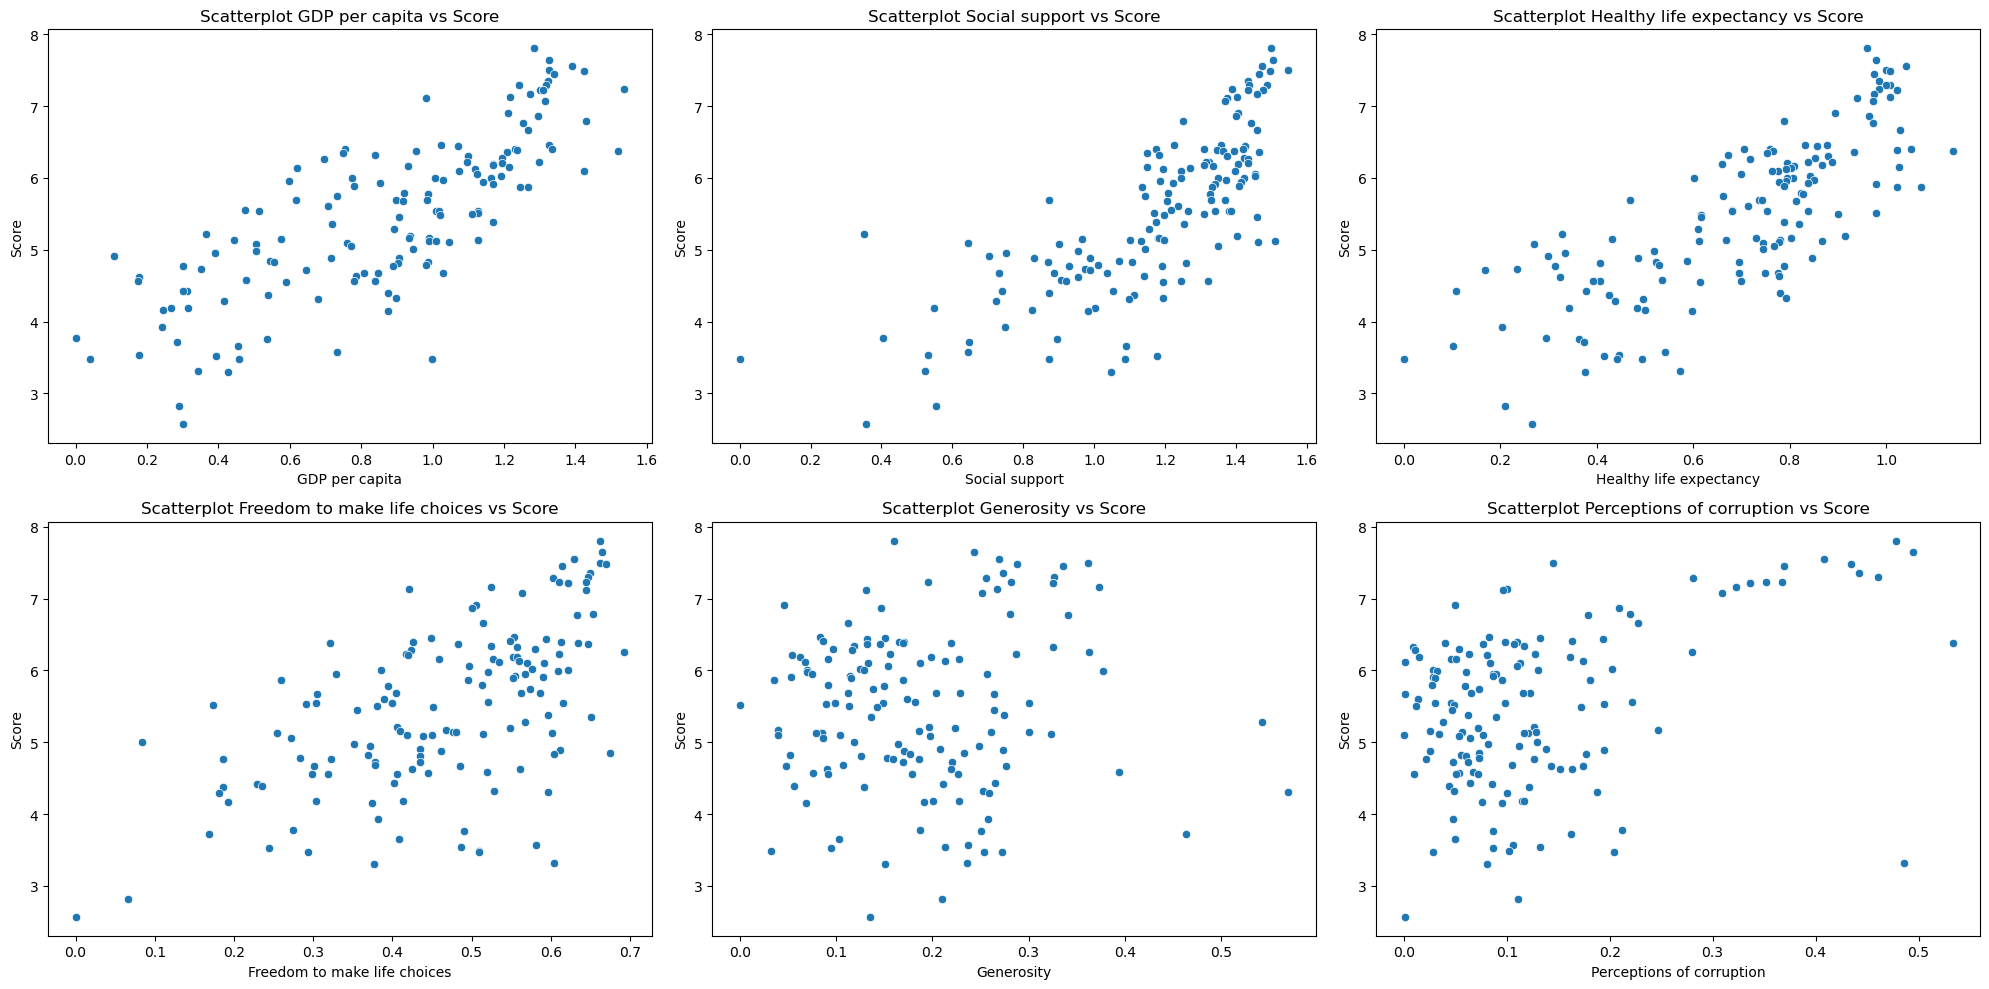

In [25]:
# Scatterplot setiap feature dengan score
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

columns = df.columns[3:9]

for i, column in enumerate(columns):
    sns.scatterplot(x=column, y='Score', data=df, ax=ax[i//3][i%3])
    ax[i//3][i%3].set_title(f'Scatterplot {column} vs Score')

plt.tight_layout()
plt.show()

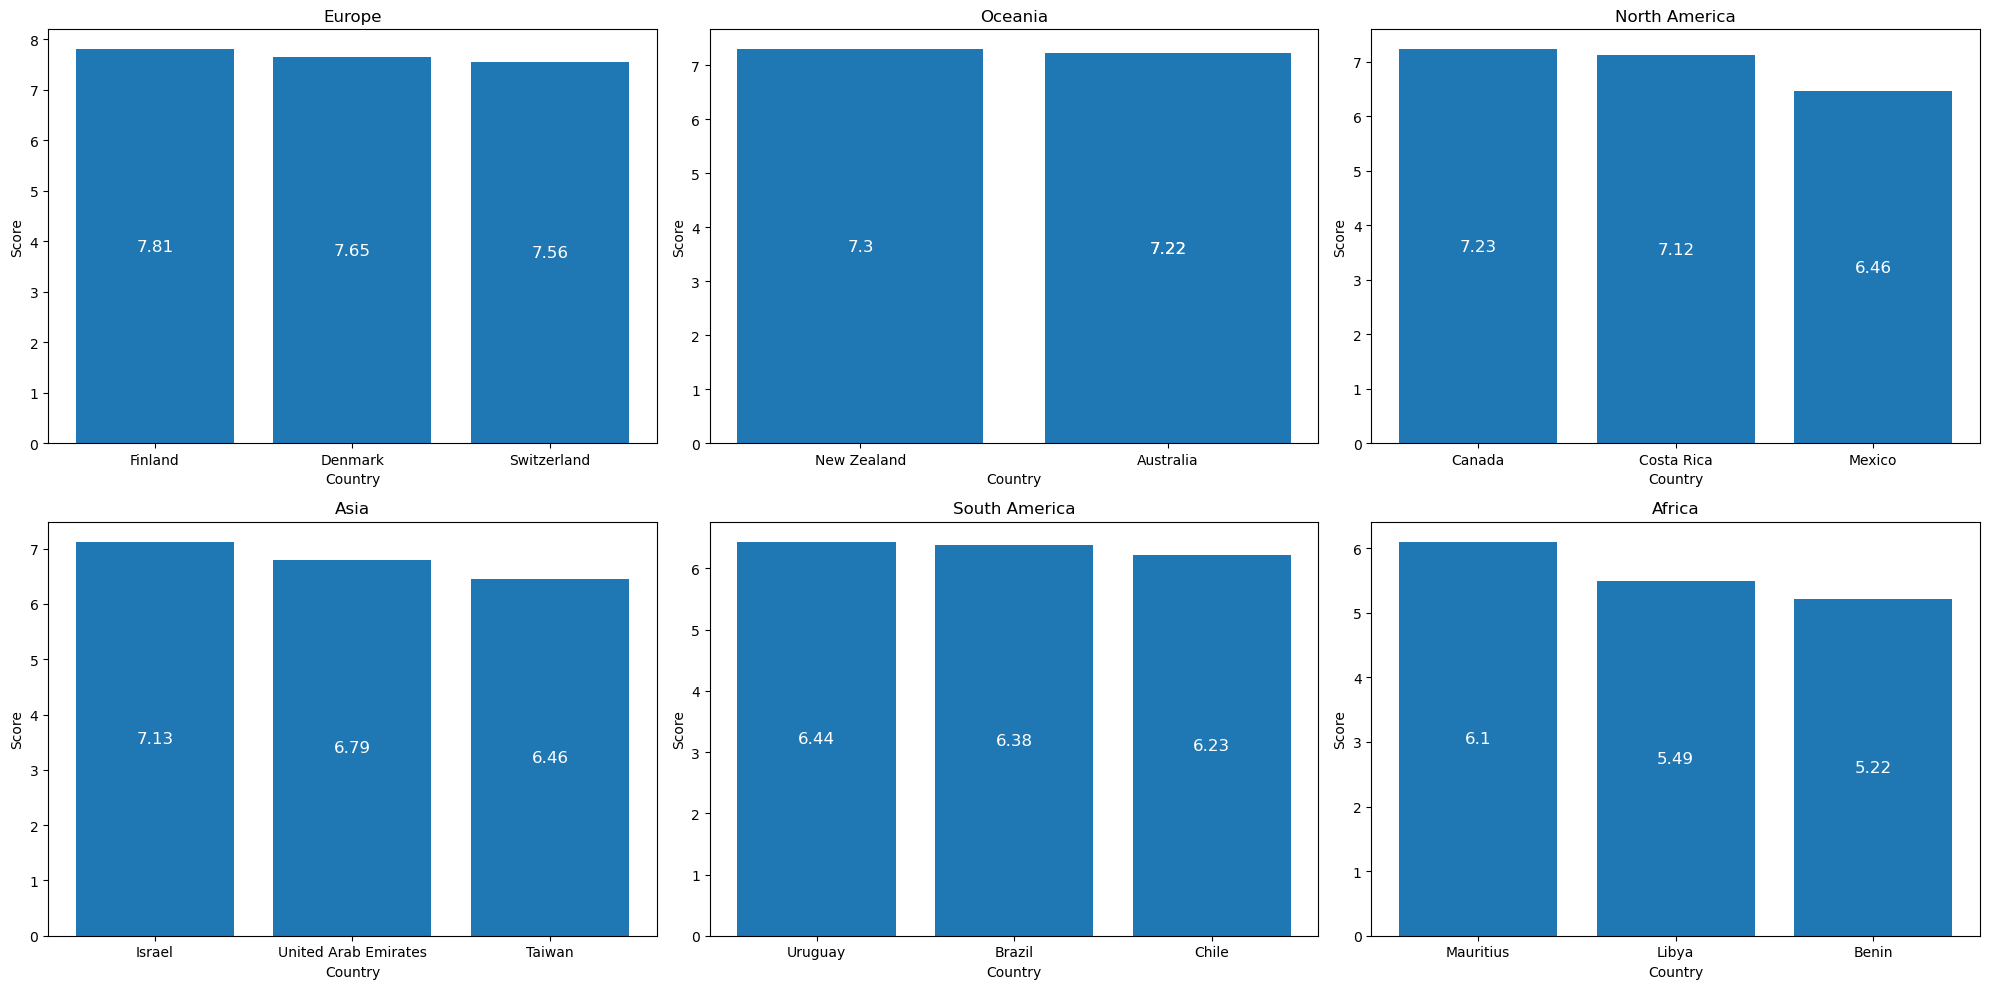

In [26]:
# Plot 3 negara di setiap benua dengan score tertinggi
continent = df['Continent'].unique()

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.subplots_adjust(hspace=2)

for i, ax in enumerate(axes.flat):
    top_3_country = df[df['Continent'] == continent[i]].sort_values('Score', ascending=False)['Country'].head(3)
    top_3_score = df[df['Continent'] == continent[i]].sort_values('Score', ascending=False)['Score'].head(3)
    ax.bar(top_3_country, top_3_score)
    
    for txt, j in zip(ax.patches, top_3_score):
        ax.text(txt.get_x() + txt.get_width()/2, txt.get_height()/2, round(j, 2), ha='center', va='center', color='white', fontsize=12)
        
    ax.set_title(continent[i])
    ax.set_xlabel('Country')
    ax.set_ylabel('Score')

plt.tight_layout()
plt.show()

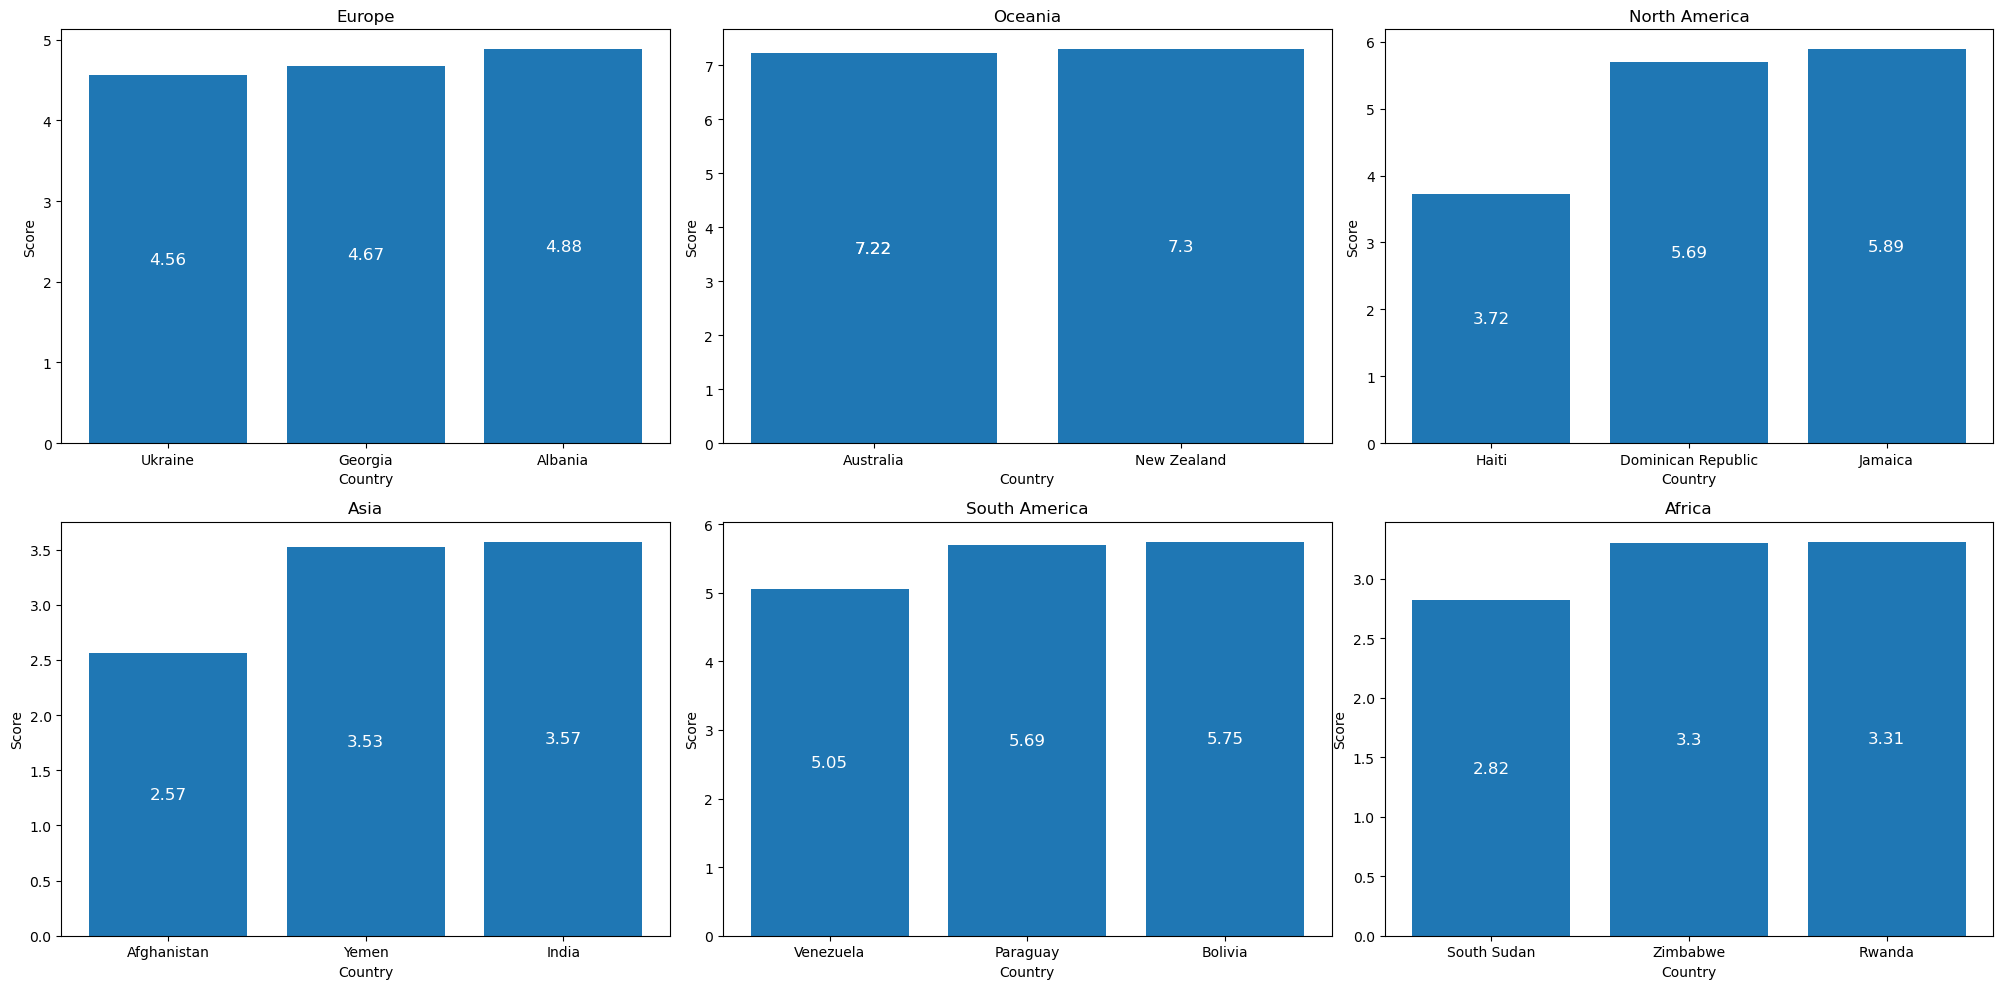

In [27]:
# Plot 3 negara di setiap benua dengan score terendah
continent = df['Continent'].unique()

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.subplots_adjust(hspace=2)

for i, ax in enumerate(axes.flat):
    bottom_3_country = df[df['Continent'] == continent[i]].sort_values('Score', ascending=True)['Country'].head(3)
    bottom_3_score = df[df['Continent'] == continent[i]].sort_values('Score', ascending=True)['Score'].head(3)
    ax.bar(bottom_3_country, bottom_3_score)
    
    for txt, j in zip(ax.patches, bottom_3_score):
        ax.text(txt.get_x() + txt.get_width()/2, txt.get_height()/2, round(j, 2), ha='center', va='center', color='white', fontsize=12)
        
    ax.set_title(continent[i])
    ax.set_xlabel('Country')
    ax.set_ylabel('Score')

plt.tight_layout()
plt.show()

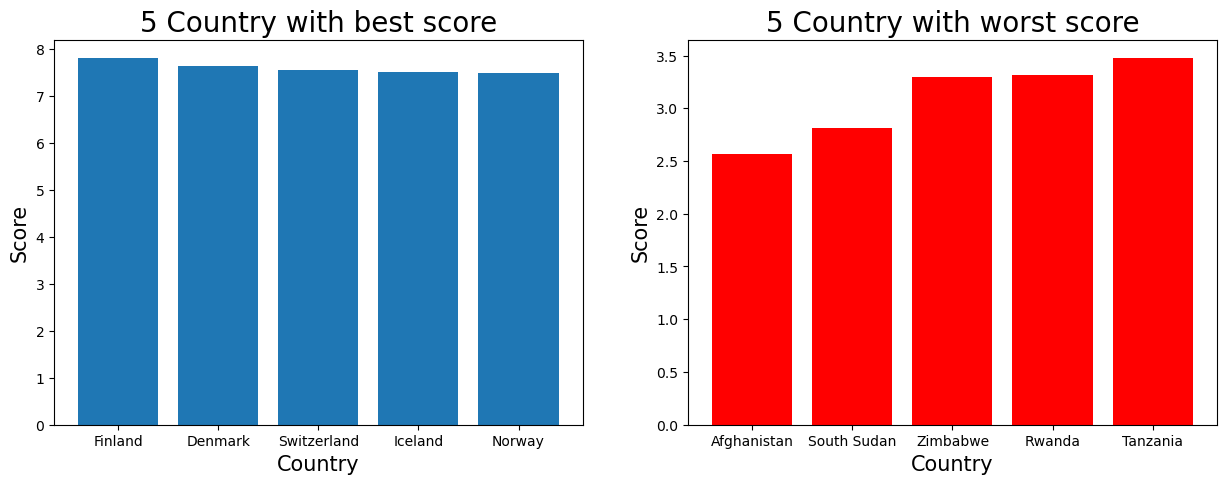

In [31]:
# Plot 5 negara dengan nilai kebahagiaan tertinggi dan terendah
top_country = df.sort_values(by='Score', ascending=False).head(5)
bottom_country = df.sort_values(by='Score', ascending=True).head(5)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].bar(top_country['Country'], top_country['Score'])
axes[0].set_title('5 Country with best score', fontsize=20)
axes[0].set_xlabel('Country', fontsize=15)
axes[0].set_ylabel('Score', fontsize=15)

axes[1].bar(bottom_country['Country'], bottom_country['Score'], color='red')
axes[1].set_title('5 Country with worst score', fontsize=20)
axes[1].set_xlabel('Country', fontsize=15)
axes[1].set_ylabel('Score', fontsize=15)
plt.show()

In [29]:
# Membuat tabel df dengan plotly
data = go.Table(
    header=dict(
        values=df.columns.tolist(),
        line = dict(color='#7D7F80'),
        fill = dict(color='#a1c3d1'),
    ),
    cells=dict(
        values=df.transpose().values.tolist(),
        line = dict(color='#7D7F80'),
        fill = dict(color='#EDFAFF'),
    )
)

tabel = go.Figure(data=[data])
tabel.show()